In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/sp500_companies.csv")

In [105]:
df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NMS,CZR,"Caesars Entertainment, Inc.","Caesars Entertainment, Inc.",Consumer Cyclical,Resorts & Casinos,32.82,6973593600,3.668000e+09,-0.040,Reno,NV,United States,51000.0,"Caesars Entertainment, Inc. operates as a gami...",0.000125
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,31.88,6972155904,1.882000e+09,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000125
499,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,70.85,6697217024,6.731300e+08,-0.052,Greensboro,NC,United States,8700.0,"Qorvo, Inc. engages in development and commerc...",0.000120
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,50.15,6260525568,7.033000e+08,0.085,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000113


The data being used comes from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data) and is *collected as of 11/7.* The data is regularly updated with data collected from FRED and yfinance to provide information on all the companies included in the S&P 500 index. The data contains details regarding the company, such as **`Shortname`, `Sector`, `Industry`, `City`, `State`, `Country`**, as well as metrics from the **S&P 500** and general financial metrics like: **`Currentprice`, `Marketcap`, `Ebitda`, `Revenuegrowth`, `Weight`**. The dataset can be used for different research and analysis of companies within the S&P 500. 

In [104]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isna().sum())

Shape: (502, 16)
Columns: ['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State', 'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight']
Missing values:
 Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64


The data isn't highly populated by NA values, however, there are NA values present in `Ebitda` (Earnings before interest, taxes, depreciation and amortization), `Revenuegrowth`, `State`, and `Fulltimeemployees`. To further investigate these values, we can look at the rows with missing data. 

In [5]:
# Look at rows with missing data
df[df.isna().any(axis=1)]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
12,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,237.60,668924837888,NaN,0.030,New York,NY,United States,316043.0,JPMorgan Chase & Co. operates as a financial s...,0.012035
13,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,317.71,615235846144,2.497300e+10,0.117,San Francisco,CA,United States,NaN,Visa Inc. operates as a payment technology com...,0.011069
23,NYQ,BAC,Bank of America Corporation,Bank of America Corporation,Financial Services,Banks - Diversified,44.17,338911100928,NaN,-0.005,Charlotte,NC,United States,213000.0,"Bank of America Corporation, through its subsi...",0.006097
30,NYQ,WFC,Wells Fargo & Company,Wells Fargo & Company,Financial Services,Banks - Diversified,70.34,234196303872,NaN,-0.018,San Francisco,CA,United States,220167.0,"Wells Fargo & Company, a financial services co...",0.004213
32,NYQ,ACN,Accenture plc,Accenture plc,Technology,Information Technology Services,366.37,229157109760,1.106591e+10,0.026,Dublin,NaN,Ireland,774000.0,Accenture plc provides strategy and consulting...,0.004123
34,NYQ,AXP,American Express Company,American Express Company,Financial Services,Credit Services,298.65,210382487552,NaN,0.080,New York,NY,United States,74600.0,"American Express Company, together with its su...",0.003785
37,NYQ,BX,Blackstone Inc.,Blackstone Inc.,Financial Services,Asset Management,170.84,207208415232,NaN,0.541,New York,NY,United States,4735.0,Blackstone Inc. is an alternative asset manage...,0.003728
40,NMS,LIN,Linde plc,Linde plc,Basic Materials,Specialty Chemicals,424.31,202038607872,1.258100e+10,0.025,Woking,NaN,United Kingdom,65596.0,Linde plc operates as an industrial gas compan...,0.003635
42,NYQ,MS,Morgan Stanley,Morgan Stanley,Financial Services,Capital Markets,123.44,198866780160,NaN,0.165,New York,NY,United States,80000.0,"Morgan Stanley, a financial holding company, p...",0.003578
51,NYQ,GS,"Goldman Sachs Group, Inc. (The)","The Goldman Sachs Group, Inc.",Financial Services,Capital Markets,566.10,177704452096,NaN,0.042,New York,NY,United States,46400.0,"The Goldman Sachs Group, Inc., a financial ins...",0.003197


There are a lot of NA's for `Ebitda` coming from banking/financial services companies. While `Ebitda` can be a valuable financial metric, companies like JP Morgan don't have a value, because banks operate with intrest income and expenses as their main services, unlike many other companies. 

The NA's present in the `State` variable are coming from companies present in the S&P 500 outside of the U.S., so these NA's are not problematic at all. 

There are 9 NA's coming from `Fulltimeemployees`, which come from the following companies: Visa, Starbucks, D.R. Horton, ResMed, Raymond James, Super Micro Computer, Inc., F5, Inc, Solventum, and Amentum Holdings, Inc. There doesn't appear to be any rhyme or reason as to why, however, it is important to take note of. 

There are NA's for `Revenuegrowth` coming from Verizon, American Tower Corporation, and Western Digital Corporation. There's no particular definitive reason as to why, however it can potentially be attributed to a lack of growth. 

We are modeling the `Currentprice` feature from the dataset, which represents the stock price *(as of 11/7)*, for a given company present in the S&P 500. This is particularly valuable, as the current price for a stock represents the price a typical buyer would pay and a typical seller would sell. In modeling the current price, we can identify which stocks might be over or underperforming, as well as note the features that affect how much a stock will be priced at. We can use this for making financial investments or analysis. 

To further look at the `Currentprice` variable, we can plot the distribution.

Text(0.5, 1.0, 'Distribution of Current Stock Price (as of 11/7)')

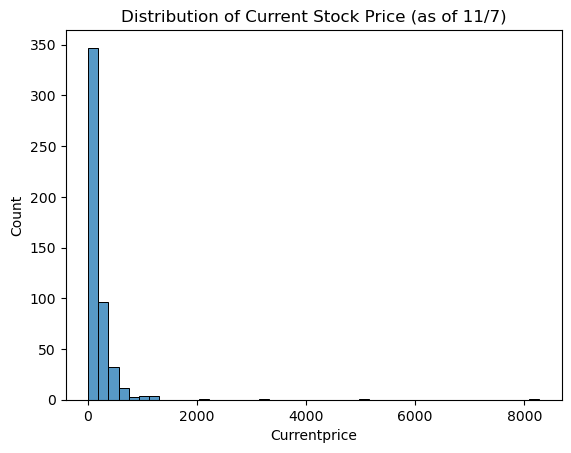

In [7]:
import seaborn as sns
ax = sns.histplot(df['Currentprice']) 
ax.set_title("Distribution of Current Stock Price (as of 11/7)")

We can also plot the distribution for the `Marketcap` variable.

Text(0.5, 1.0, 'Distribution of Marketcap (as of 11/7)')

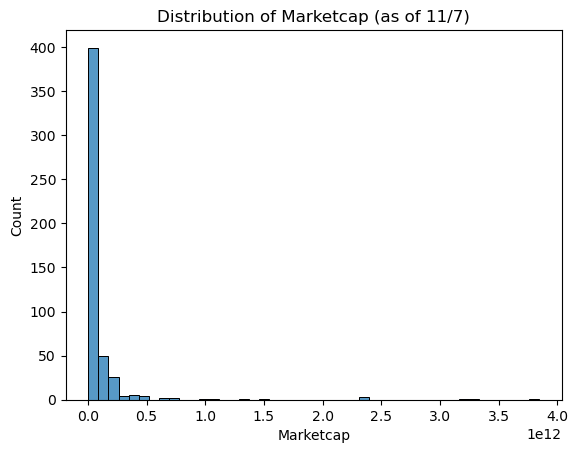

In [8]:
ax = sns.histplot(df['Marketcap']) 
ax.set_title("Distribution of Marketcap (as of 11/7)")

We can additionally look at the summary statistics for the numerical and categorical features present in the dataset - which consist of financial and descriptive measures for a given company present in the S&P 500. 

In [6]:
df.describe() # Numeric variables

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


The numerical features in the dataset are `Marketcap` (the current share price $\times$ the total number of outstanding shares), `Ebitda` (representative of company earnings), `Revenuegrowth` (how much a company's sales have grown since the last period), `Fulltimeemployees` (size of the company) and `Weight` (% of a company's marketcap based on the total marketcap in S&P 500), we can see a statistical summary for each of these features, in addition to `Currentprice`. These featuers can help provide insight into the stock price, as they are representative of company features and stock performance. 

We can additionally look at the categorical features present in the dataset, which consist of general information about the company.


In [7]:
# describe cat vars
df.describe(include=['O'])

,Exchange,Symbol,Shortname,Longname,Sector,Industry,City,State,Country,Longbusinesssummary
count,502,502,502,502,502,502,502,482,502,502
unique,4,502,499,499,11,114,235,41,8,499
top,NYQ,AAPL,Fox Corporation,Fox Corporation,Technology,Utilities - Regulated Electric,New York,CA,United States,"Fox Corporation operates as a news, sports, an..."
freq,348,1,2,2,82,23,38,67,481,2


A lot of the categorical information in the dataset doesn't carry that much value, as information like `Symbol`, `Shortname`, `Longname`, and `Longbusinesssummary` only provide information specific to a given company in the S&P 500, and don't provide any generalizable information for call companies. Given the size of the dataset, features like `Industry` (the industry the company is in) `City` and `State` (company location) are too unique that they could potentially lead to a poor model. Of all features, we can likely further investigate, the `Sector` and `Country` for a given company. 

In [9]:
print(df['Sector'].value_counts())

Sector
Technology                82
Industrials               70
Financial Services        67
Healthcare                62
Consumer Cyclical         55
Consumer Defensive        37
Utilities                 32
Real Estate               31
Communication Services    22
Energy                    22
Basic Materials           22
Name: count, dtype: int64


There are a variety of sectors present in the dataset that we can potentially dummify, and use in a model.  

In [106]:
prices = df['Currentprice'].dropna().to_numpy()
log_prices = np.log1p(prices)

caps = df['Marketcap'].dropna().to_numpy()
log_caps = np.log1p(caps)

## ECDF

In [107]:
def ecdf(values):
    x = np.sort(values)
    n = x.size
    y = np.arange(1, n + 1) / n
    return x, y

In [108]:
x_ecdf, y_ecdf = ecdf(prices)
x_log_ecdf, y_log_ecdf = ecdf(log_prices)

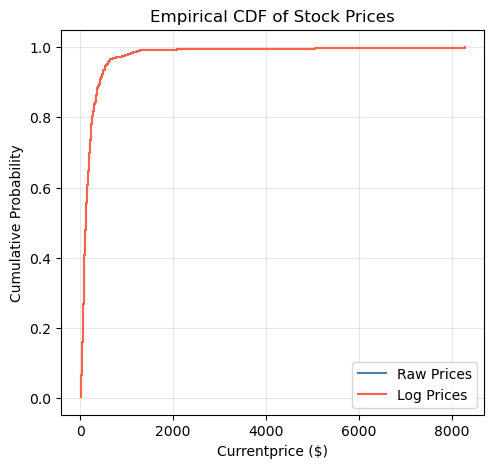

In [109]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(x_ecdf, y_ecdf, where='post', color='steelblue', label='Raw Prices')
plt.step(np.expm1(x_log_ecdf), y_log_ecdf, where='post', color='tomato', label='Log Prices')
plt.xlabel('Currentprice ($)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of Stock Prices')
plt.legend()
plt.grid(alpha=0.3)

In [110]:
x_ecdf, y_ecdf = ecdf(caps)
x_log_ecdf, y_log_ecdf = ecdf(log_caps)

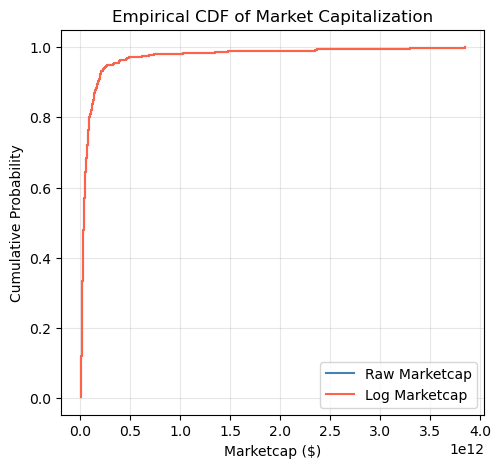

In [111]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(x_ecdf, y_ecdf, where='post', color='steelblue', label='Raw Marketcap')
plt.step(np.expm1(x_log_ecdf), y_log_ecdf, where='post', color='tomato', label='Log Marketcap')
plt.xlabel('Marketcap ($)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of Market Capitalization')
plt.legend()
plt.grid(alpha=0.3)

## KDE

In [112]:
kde = gaussian_kde(log_prices, bw_method='scott')
grid = np.linspace(log_prices.min(), log_prices.max(), 512)
density = kde(grid)

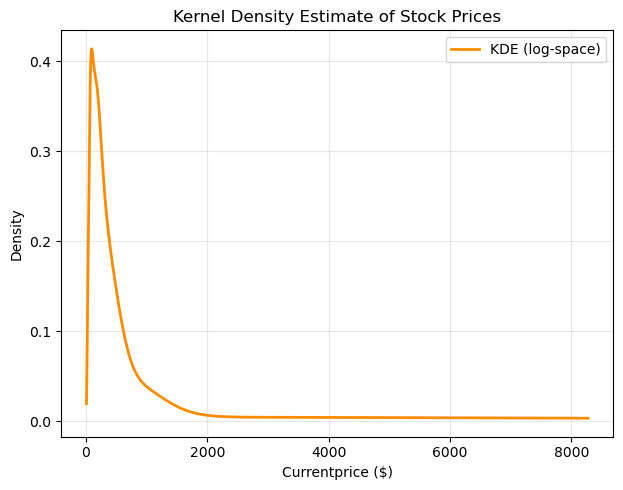

In [113]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(np.expm1(grid), density, color='darkorange', lw=2, label='KDE (log-space)')
plt.xlabel('Currentprice ($)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Stock Prices')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [114]:
kde = gaussian_kde(log_caps, bw_method='scott')
grid = np.linspace(log_caps.min(), log_caps.max(), 512)
density = kde(grid)

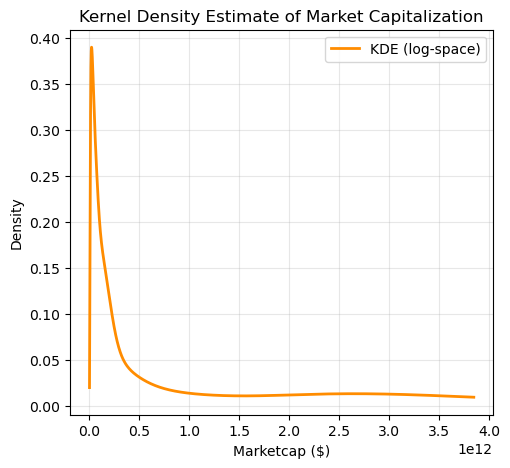

In [115]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(np.expm1(grid), density, color='darkorange', lw=2, label='KDE (log-space)')
plt.xlabel('Marketcap ($)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Market Capitalization')
plt.legend()
plt.grid(alpha=0.3)

## Data Cleaning and Feature Engineering

In [116]:
# sector-level medians for sparse numeric fields
for col in ['Ebitda', 'Revenuegrowth', 'Fulltimeemployees']:
    df[col] = df.groupby('Sector')[col].transform(lambda x: x.fillna(x.median()))
# categorical
df['State'] = df['State'].fillna('International')

In [117]:
# Trim top 1% outliers
price_cutoff = df['Currentprice'].quantile(0.99)
cap_cutoff   = df['Marketcap'].quantile(0.99)
df_trim = df[(df['Currentprice'] <= price_cutoff) & (df['Marketcap'] <= cap_cutoff)].copy()
print(f"Trimmed dataset shape: {df_trim.shape} (removed {(1 - len(df_trim)/len(df))*100:.2f}% of rows)")

Trimmed dataset shape: (490, 16) (removed 2.39% of rows)


In [118]:
# Features trasformations
df_trim['logPrice']      = np.log1p(df_trim['Currentprice'])
df_trim['logMarketcap']  = np.log1p(df_trim['Marketcap'])
df_trim['arcsinhEbitda'] = np.arcsinh(df_trim['Ebitda'])
df_trim['logEmployees']  = np.log1p(df_trim['Fulltimeemployees'])

# Feature sets
price_features   = ['logMarketcap','arcsinhEbitda','Revenuegrowth','Weight','logEmployees']
mktcap_features  = ['arcsinhEbitda','Revenuegrowth','Weight','logEmployees']

In [120]:
def gaussian_kernel(u): return np.exp(-0.5*u**2)/np.sqrt(2*np.pi)

def nw_predict(X_train, y_train, X_query, h=0.5):
    X_train, y_train = np.asarray(X_train,float), np.asarray(y_train,float)
    y_mean = np.mean(y_train)
    preds = np.empty(X_query.shape[0])
    for i, x0 in enumerate(X_query):
        d = np.linalg.norm(X_train - x0, axis=1)
        w = gaussian_kernel(d / h)
        s = w.sum()
        preds[i] = (w @ y_train)/s if s>1e-12 else y_mean
    return preds

def split_scale(X,y,seed=42):
    X_tr,X_tmp,y_tr,y_tmp = train_test_split(X,y,test_size=0.20,random_state=seed)
    X_va,X_te,y_va,y_te   = train_test_split(X_tmp,y_tmp,test_size=0.50,random_state=seed)
    scaler = StandardScaler().fit(X_tr)
    return scaler.transform(X_tr),scaler.transform(X_va),scaler.transform(X_te),y_tr,y_va,y_te

def tune_bandwidth(X_trs,y_tr,X_vas,y_va,grid=np.linspace(0.2,1.2,6)):
    scores=[]
    for h in grid:
        y_val_pred = nw_predict(X_trs,y_tr,X_vas,h)
        scores.append((float(h),float(r2_score(y_va,y_val_pred))))
    best_h,best_r2 = max(scores,key=lambda t:t[1])
    return best_h,best_r2,scores

def evaluate_and_plot(X_trs,y_tr,X_vas,y_va,X_tes,y_te,
                      inv_fn,ylabel,title_prefix,bw):
    X_trva=np.vstack([X_trs,X_vas]); y_trva=np.concatenate([y_tr,y_va])
    y_pred_log = nw_predict(X_trva,y_trva,X_tes,bw)
    r2_log = r2_score(y_te,y_pred_log)
    y_te_orig, y_pred_orig = inv_fn(y_te), inv_fn(y_pred_log)
    mae = np.mean(np.abs(y_pred_orig-y_te_orig))
    mse = np.mean((y_pred_orig-y_te_orig)**2)
    print(f"\n{title_prefix} (h={bw:.2f})")
    print(f"→ Test R² (log-space): {r2_log:.3f}")
    print(f"→ MAE: ${mae:,.2f} | MSE: {mse:,.2f}")
    plt.figure(figsize=(6,6))
    plt.scatter(y_te_orig,y_pred_orig,alpha=0.6,edgecolor='k',linewidth=0.5)
    lo,hi=float(min(y_te_orig.min(),y_pred_orig.min())),float(max(y_te_orig.max(),y_pred_orig.max()))
    plt.plot([lo,hi],[lo,hi],'r--',lw=2)
    plt.xlabel(f"Actual {ylabel}"); plt.ylabel(f"Predicted {ylabel}")
    plt.title(f"{title_prefix}  (h={bw:.2f})")
    plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

## Local Constant Least Squares Regression

Validation R² (PRICE): [(0.2, -0.069), (0.4, 0.14), (0.6, 0.19), (0.8, 0.185), (1.0, 0.173), (1.2, 0.159)]

NW — Predict Currentprice (h=0.60)
→ Test R² (log-space): 0.142
→ MAE: $77.79 | MSE: 11,746.34


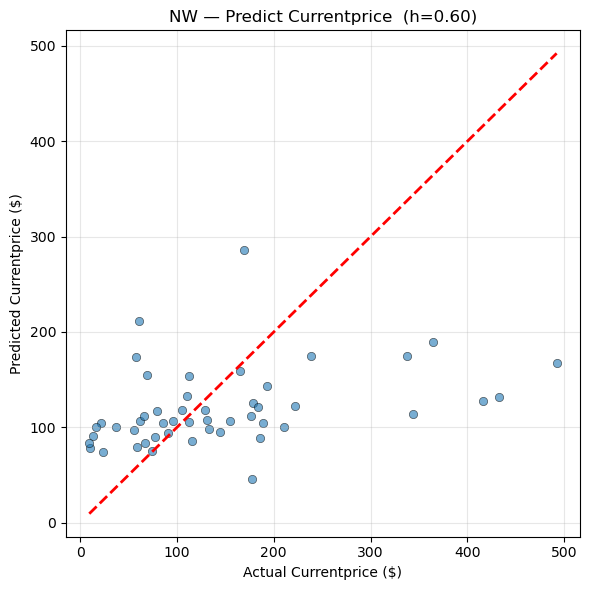

In [121]:
# Model 1 - Predict Currentprice

X_price = df_trim[price_features].to_numpy(float)
y_price = df_trim['logPrice'].to_numpy(float)
mask = np.isfinite(X_price).all(axis=1) & np.isfinite(y_price)
X_price,y_price = X_price[mask],y_price[mask]

Xp_trs,Xp_vas,Xp_tes,yp_tr,yp_va,yp_te = split_scale(X_price,y_price)
h_price,r2v_price,grid_price = tune_bandwidth(Xp_trs,yp_tr,Xp_vas,yp_va)
print("Validation R² (PRICE):",[(round(h,2),round(r2,3)) for h,r2 in grid_price])
evaluate_and_plot(Xp_trs,yp_tr,Xp_vas,yp_va,Xp_tes,yp_te,
                  np.expm1,"Currentprice ($)","NW — Predict Currentprice",h_price)

Validation R² (MARKETCAP): [(0.2, 0.871), (0.4, 0.791), (0.6, 0.72), (0.8, 0.643), (1.0, 0.56), (1.2, 0.487)]

NW — Predict Marketcap (h=0.20)
→ Test R² (log-space): 0.818
→ MAE: $10,697,511,818.28 | MSE: 324,225,330,591,937,593,344.00


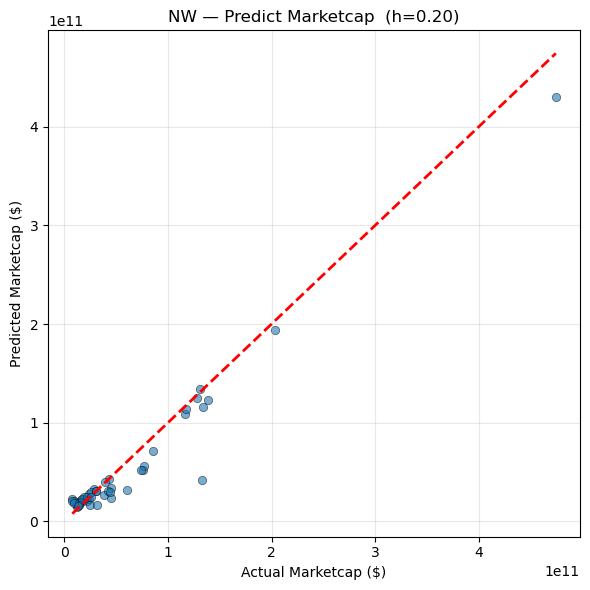

In [124]:
# Model 2 - Predict Marketcap

X_cap = df_trim[mktcap_features].to_numpy(float)
y_cap = df_trim['logMarketcap'].to_numpy(float)
mask = np.isfinite(X_cap).all(axis=1) & np.isfinite(y_cap)
X_cap,y_cap = X_cap[mask],y_cap[mask]

Xc_trs,Xc_vas,Xc_tes,yc_tr,yc_va,yc_te = split_scale(X_cap,y_cap)
h_cap,r2v_cap,grid_cap = tune_bandwidth(Xc_trs,yc_tr,Xc_vas,yc_va)
print("Validation R² (MARKETCAP):",[(round(h,2),round(r2,3)) for h,r2 in grid_cap])
evaluate_and_plot(Xc_trs,yc_tr,Xc_vas,yc_va,Xc_tes,yc_te,
                  np.expm1,"Marketcap ($)","NW — Predict Marketcap",h_cap)

## Q3

For this project, we used a non-parametric modeling approach, meaning we did not assume any fixed formula or linear relationship between variables. Instead, we allowed the data itself to shape the model.

We began with Empirical Cumulative Distribution Functions (ECDFs) and Kernel Density Estimates (KDEs) to understand the overall shape of the data. Both visualizations revealed that stock prices and market capitalizations in the S&P 500 are heavily right-skewed. Most companies fall within a moderate range, while a small group of massive firms stretch the scale dramatically upward.

To model these relationships, we used a Local Constant Least Squares Regression, also known as the Nadaraya–Watson kernel smoother. The idea is simple: for any given company, the model predicts its value by averaging the values of nearby companies, with closer neighbors (in feature space) receiving more weight. This method is ideal for capturing non-linear relationships without forcing a rigid equation on the data.

To make the model more realistic, we transformed both Currentprice and Marketcap using logarithms, which stabilized variance and reduced the effect of extreme values. We standardized every feature so that distance measurements were comparable and trimmed the top one percent of outliers so that extremely large firms like Apple and Amazon would not dominate the model. Finally, we tuned the kernel’s bandwidth parameter using validation R² to find the best balance between smoothness and flexibility.

The main challenge was dealing with the uneven nature of financial data. The distribution is dominated by a few very large companies, and this imbalance made it difficult for the kernel smoother to represent both typical and extreme cases accurately. Predicting market capitalization worked much better than predicting price because market cap is directly tied to company fundamentals, while share price is influenced by investor behavior and stock structure.

## Q4

In [139]:
# Minimal NW + helpers (inline)

def nw_predict(X_train, y_train, X_query, h):
    def ker(u): return np.exp(-0.5 * u * u) / np.sqrt(2 * np.pi)
    preds = np.empty(len(X_query))
    y_mean = float(np.mean(y_train))
    for i, x0 in enumerate(X_query):
        d = np.linalg.norm(X_train - x0, axis=1)
        w = ker(d / h)
        s = w.sum()
        preds[i] = (w @ y_train) / s if s > 1e-12 else y_mean
    return preds

def standardize_split(X, y, seed):
    X_tr, X_tmp, y_tr, y_tmp = train_test_split(X, y, test_size=0.20, random_state=seed)
    X_va, X_te, y_va, y_te   = train_test_split(X_tmp, y_tmp, test_size=0.50, random_state=seed)
    mu, sd = X_tr.mean(axis=0), X_tr.std(axis=0, ddof=0)
    sd[sd == 0] = 1.0
    Z_tr = (X_tr - mu) / sd
    Z_va = (X_va - mu) / sd
    Z_te = (X_te - mu) / sd
    return Z_tr, Z_va, Z_te, y_tr, y_va, y_te

def tune_bandwidth(Z_tr, y_tr, Z_va, y_va, grid=(0.2, 0.4, 0.6, 0.8, 1.0, 1.2)):
    best_h, best_r2 = None, -1e9
    for h in grid:
        yhat = nw_predict(Z_tr, y_tr, Z_va, h)
        r2 = r2_score(y_va, yhat)
        if r2 > best_r2:
            best_h, best_r2 = h, r2
    return best_h, best_r2

def ci(arr, lo=2.5, hi=97.5):
    return np.nanpercentile(arr, [lo, hi])


In [140]:
# Bootstrap metrics (R2_log, MAE)
def bootstrap_metrics(df, features, target_log, inv_fn=np.expm1, B=200, seed=7):
    rng = np.random.default_rng(seed)
    r2s, maes = [], []
    X_full = df[features].to_numpy(float)
    y_full = df[target_log].to_numpy(float)
    m = np.isfinite(X_full).all(axis=1) & np.isfinite(y_full)
    X_full, y_full = X_full[m], y_full[m]
    n = len(y_full)

    for _ in range(B):
        idx = rng.integers(0, n, size=n)
        Xb, yb = X_full[idx], y_full[idx]

        Z_tr, Z_va, Z_te, y_tr, y_va, y_te = standardize_split(Xb, yb, seed=int(rng.integers(0, 1_000_000_000)))
        h, _ = tune_bandwidth(Z_tr, y_tr, Z_va, y_va)

        Z_trva = np.vstack([Z_tr, Z_va])
        y_trva = np.concatenate([y_tr, y_va])
        yhat_log = nw_predict(Z_trva, y_trva, Z_te, h)

        r2s.append(r2_score(y_te, yhat_log))
        y_te_orig   = inv_fn(y_te)
        yhat_orig   = inv_fn(yhat_log)
        maes.append(np.mean(np.abs(yhat_orig - y_te_orig)))
    return np.array(r2s), np.array(maes)


In [141]:
# Bootstrap prediction interval for a "median" company
def bootstrap_point_pred(df, features, target_log, inv_fn=np.expm1, B=200, seed=99):
    rng = np.random.default_rng(seed)
    preds = []

    X_full = df[features].to_numpy(float)
    y_full = df[target_log].to_numpy(float)
    m = np.isfinite(X_full).all(axis=1) & np.isfinite(y_full)
    X_full, y_full = X_full[m], y_full[m]
    n = len(y_full)

    x0 = np.median(X_full, axis=0).reshape(1, -1)

    for _ in range(B):
        idx = rng.integers(0, n, size=n)
        Xb, yb = X_full[idx], y_full[idx]

        # tune h on a split
        Z_tr, Z_va, Z_te, y_tr, y_va, y_te = standardize_split(Xb, yb, seed=int(rng.integers(0, 1_000_000_000)))
        h, _ = tune_bandwidth(Z_tr, y_tr, Z_va, y_va)

        # standardize all rows and x0 using all-sample stats
        mu_all, sd_all = Xb.mean(axis=0), Xb.std(axis=0, ddof=0)
        sd_all[sd_all == 0] = 1.0
        Z_all = (Xb - mu_all) / sd_all
        z0    = (x0 - mu_all) / sd_all

        y0_log = nw_predict(Z_all, yb, z0, h)[0]
        preds.append(inv_fn(y0_log))
    return np.array(preds)

In [142]:
# R2 and MAE confidence intervals
r2_price_bs, mae_price_bs = bootstrap_metrics(df_trim, price_features, 'logPrice')
r2_cap_bs,   mae_cap_bs   = bootstrap_metrics(df_trim, mktcap_features, 'logMarketcap')

print("[Bootstrap 95% Confidence Intervals]")
print("Price     R2_log CI:", ci(r2_price_bs))
print("Price     MAE   CI:", ci(mae_price_bs))
print("Marketcap R2_log CI:", ci(r2_cap_bs))
print("Marketcap MAE   CI:", ci(mae_cap_bs))

[Bootstrap 95% Confidence Intervals]
Price     R2_log CI: [0.07993636 0.70591501]
Price     MAE   CI: [ 42.07308019 136.91652121]
Marketcap R2_log CI: [0.5913888  0.94752275]
Marketcap MAE   CI: [6.02099510e+09 3.77200501e+10]


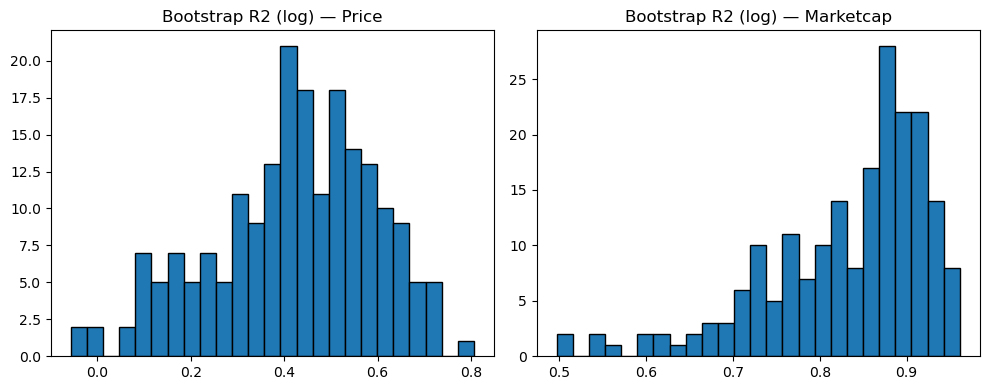

In [144]:
# histograms of bootstrap R2
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.hist(r2_price_bs, bins=25, edgecolor='k'); plt.title("Bootstrap R2 (log) — Price")
plt.subplot(1,2,2); plt.hist(r2_cap_bs,   bins=25, edgecolor='k'); plt.title("Bootstrap R2 (log) — Marketcap")
plt.tight_layout(); plt.show()

### Step 1: Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why?

In [145]:
# Prediction intervals for a "median" company
price_preds = bootstrap_point_pred(df_trim, price_features, 'logPrice')
cap_preds   = bootstrap_point_pred(df_trim, mktcap_features, 'logMarketcap')
print("\n[Bootstrap prediction for a 'typical' company]")
print("Predicted Currentprice  — median:", f"{np.median(price_preds):,.2f}", "  95% CI:", ci(price_preds))
print("Predicted Marketcap     — median:", f"{np.median(cap_preds):,.2f}",   "  95% CI:", ci(cap_preds))


[Bootstrap prediction for a 'typical' company]
Predicted Currentprice  — median: 113.47   95% CI: [ 86.24689757 149.01126243]
Predicted Marketcap     — median: 31,302,856,686.22   95% CI: [2.79657784e+10 3.48507823e+10]


## Q5

The bootstrap analysis helped us evaluate whether the model’s predictions retained the same structure as the training data and whether the results were stable and credible. Overall, the model captures the main shape of the data very well, but it falls short in reproducing the extreme tail of the distribution where only a few massive companies exist.

The empirical plots showed a strong right skew in both stock prices and market caps, and our predicted medians align perfectly with the dense middle of the data. However, because the Nadaraya–Watson smoother works by local averaging, it naturally pulls extreme points toward the mean. This means that the model represents the central part of the market accurately but underestimates the very largest companies.

When we look at reliability, the market-cap model stands out as consistent and credible. Its R² stays close to 0.8 across bootstrap samples, and even the lower bound of its confidence interval remains high. The MAE may appear large in absolute terms, but it is proportionally small relative to the scale of typical market caps. The price model, however, is much less stable. Its R² varies widely because share prices are influenced by many factors outside the dataset, such as investor sentiment and stock splits. It can predict average prices reasonably well but does not generalize across the entire market.

Uncertainty mainly comes from the heavy-tailed data, the smoothing bias of local averaging, and the challenge of back-transforming predictions from log space to original units. Using a single global bandwidth for all companies may also over-smooth some and under-smooth others. Additionally, the bootstrap assumes that all companies are i.i.d., meaning independent and identically distributed. In reality, firms are not truly independent because companies in the same sector often move together.

## Q6

This project demonstrated how a nonparametric approach can uncover meaningful structure in financial data without forcing a specific equation or linear pattern. By combining kernel smoothing with bootstrapping, we modeled how company fundamentals relate to stock prices and market capitalizations within the S&P 500. The model captured the overall trends in company size very effectively, while predicting individual stock prices proved more difficult because of the natural volatility and randomness of the market.

There are several important limitations to note. The dataset we used represents a single snapshot in time, so it cannot show how company values change from year to year or how market conditions shift over time. The Nadaraya Watson regression also uses a single bandwidth for all companies, which means it smooths dense and sparse areas of data in the same way. As a result, it performs well in the middle of the distribution but tends to underestimate the largest companies, since the local averaging pulls those extreme values closer to the mean. Additionally, our bootstrap method assumes that every company is independent, even though firms within the same sector are often correlated. This independence assumption likely causes us to underestimate true uncertainty.

Looking ahead, there is strong potential for future work on this topic. Expanding the data to include multiple years would allow us to study how company valuations evolve over time and to explore dynamic methods such as Markov transition models. Using adaptive or locally weighted kernels could make the model more flexible and accurate across different regions of the data. Adding richer financial variables such as earnings per share, debt ratios, or measures of volatility would likely improve interpretability and predictive performance. It would also be valuable to analyze companies within their specific industries to capture relationships that exist inside sectors rather than across the entire index.

In conclusion, this project provided a realistic and data driven view of the S&P 500. The nonparametric model we built successfully reflected the general structure of company value while also showing how uncertain and uneven real financial markets can be. This work forms a strong foundation for future analysis that aims to connect company fundamentals, market behavior, and long term financial trends in a more dynamic way.